In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Percentiles

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
percentile(25, v)

3

In [4]:
percentile(50, v)

5

In [5]:
percentile(99, v)

9

## Estimation

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [11]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [12]:
sf.sort('Total Compensation')

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [13]:
sf.sort('Total Compensation', descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


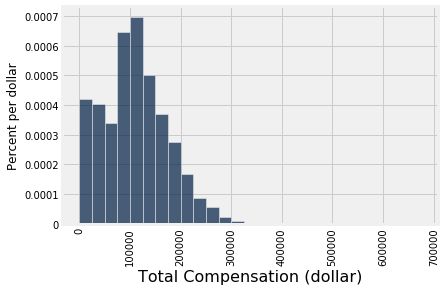

In [14]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit="dollar")

In [17]:
percentile(50, sf.column('Total Compensation'))

107219.48

In [18]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Community Health,Hospital Eligiblity Worker,"110,718"
Public Protection,Sergeant 2,"42,111"
Public Protection,Deputy Probation Officer,"137,622"


In [19]:
percentile(50, sample_from_population.column('Total Compensation'))

107435.08

In [20]:
np.median(sf.column('Total Compensation'))

107219.48

In [21]:
np.median(sample_from_population.column('Total Compensation'))

107768.20000000001

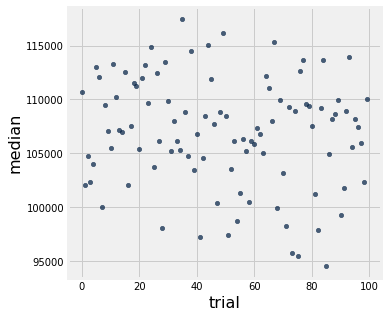

In [22]:
medians = []
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = np.median(sample.column('Total Compensation'))
    medians.append(median)
    
Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

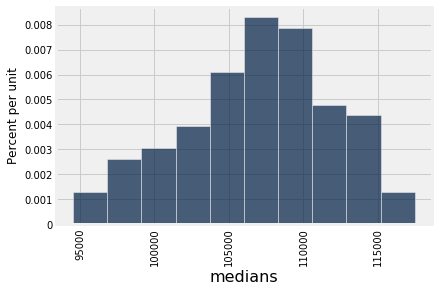

In [23]:
Table().with_column('medians', medians).hist(0)

## The Bootstrap

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [24]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Public Protection,Police Officer 2,"130,936"
"Public Works, Transportation & Commerce",Street Inspector,"43,513"
Community Health,Hospital Eligiblity Worker,"96,491"


In [25]:
np.median(sample_from_population.column('Total Compensation'))

109026.845

In [26]:
resample = sample_from_population.sample()

In [27]:
np.median(resample.column('Total Compensation'))

110578.495

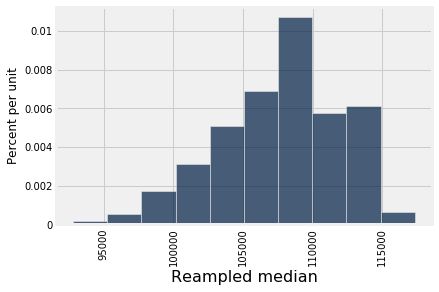

In [28]:
medians = []

for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    medians.append(median)
    
Table().with_column('Reampled median', medians).hist()

In [29]:
percentile(2.5, medians)

97761.89

In [30]:
percentile(97.5, medians)

114732.01

95% confidnece internal range from 99761 and 114732. this is a range of where we might expect that media to lie 

In [31]:
percentile(0.5, medians)

95320.58

In [32]:
percentile(99.5, medians)

116469.54000000001

In [33]:
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200, with_replacement=False)
    medians = []
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        medians.append(median)
        
    interval_95 = [percentile(2.5, medians),
                   percentile(97.5, medians)]
    
    intervals.append(interval_95)

In [37]:
intervals

Lower,Upper
93297.5,111506
103098,121908
98599.7,115631
100448,116190
94929.5,115025
99247.7,119902
100632,116780
100825,117375
91458.9,124484
97563.6,116431


In [34]:
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

96

In [35]:
intervals.where('Lower', are.above(truth))

Lower,Upper
109306,126079
112424,133203


In [36]:
intervals.where('Upper', are.below(truth))

Lower,Upper
93209.1,103803
88120.8,104680
